# Lab Linear regression

In this Assignment, you will explore the **FIFA 19** dataset, which contains detailed attributes for every player registered in the latest edition of FIFA 19 database.    
It was scrapped from this [website](https://sofifa.com/), and you can find the source code [here](https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019).

Your goal is to find out how the `Overall` score by player is calculated

There are 2 main parts:

* Data Import & Cleaning, the output of this part is provided in the csv file `data_cleaned`, **so you do not need to have everything right in this part to do the second one**
* Modeling with the cleaned data

In the notebook, there will be cells in the form `assert condition` like the next one. They are used to check if an answer is correct.  
Execute the next one and you will get no errors

In [1]:
assert 3 < 5

Execute the next one and you will get an error

In [2]:
assert 3 > 5

AssertionError: 

# Data Import

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.1. Load the csv file `data.csv` into a dataframe called `df` and print its shape. (Set the right parameters when reading the csv file)       

In [11]:
df = pd.read_csv('data.csv',index_col=0)
print(df.shape)

(18207, 88)


In [12]:
# check if your answer is correct
assert df.shape == (18207, 88)

1.2. print the head of `df`

In [13]:
# your code here
print(df.head(1))

       ID      Name  Age                                           Photo  \
0  158023  L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   

  Nationality                                 Flag  Overall  Potential  \
0   Argentina  https://cdn.sofifa.org/flags/52.png       94         94   

           Club                                     Club Logo  ... Composure  \
0  FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...      96.0   

  Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  GKKicking  \
0    33.0            28.0          26.0       6.0        11.0       15.0   

  GKPositioning GKReflexes Release Clause  
0          14.0        8.0        €226.5M  

[1 rows x 88 columns]


1.3. Print how many columns that are in df columns types

In [16]:
print(df.shape[1])
# your code here

77


1.4. `to_drop` is a list containing columns that are not useful for modeling, remove them and print the new shape of `df`

In [14]:
to_drop =['ID', 'Name', 'Photo','Nationality', 'Flag','Club','Club Logo', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until']
df.drop(to_drop, axis=1,inplace=True)
print(df.shape)

(18207, 77)


In [15]:
# check if your answer is correct
assert df.shape == (18207, 77)

# Data Cleaning

## Handling missing values

2.1. Build a dataframe called `missing` which has the following format:

* `pct` is the percentage of missing values, **takes values between `0` and `100`**
* the index is the column names

|     | pct |
|-----|-----|
|......|.....|
|Strength |0.263635|
|.....|.....|



In [17]:
p_missing = df.isnull().sum() * 100 / len(df)
missing = pd.DataFrame({'index': df.columns,
                                 'pct': p_missing})
print(missing)

                         index       pct
Age                        Age  0.000000
Overall                Overall  0.000000
Potential            Potential  0.000000
Value                    Value  0.000000
Wage                      Wage  0.000000
...                        ...       ...
GKHandling          GKHandling  0.263635
GKKicking            GKKicking  0.263635
GKPositioning    GKPositioning  0.263635
GKReflexes          GKReflexes  0.263635
Release Clause  Release Clause  8.590103

[77 rows x 2 columns]


2.2. Remove from `missing`, rows with `pct`= 0   
sort `missing` in ascending order of `pct` and print its head

In [18]:
# your code here
missing = missing[missing['pct'] != 0]
missing.sort_values('pct', ascending=True,inplace=True)
print(missing)

                         index        pct
Preferred Foot  Preferred Foot   0.263635
Strength              Strength   0.263635
Stamina                Stamina   0.263635
Jumping                Jumping   0.263635
ShotPower            ShotPower   0.263635
...                        ...        ...
RWB                        RWB  11.451639
LB                          LB  11.451639
LCB                        LCB  11.451639
RCB                        RCB  11.451639
RB                          RB  11.451639

[71 rows x 2 columns]


2.3. Now, let's fill missing values where the % of missing is lower than 1 (1%).   
First identify these columns in a list named `cols_to_fill`

In [20]:
# your code here
cols_to_fill_df = missing.loc[missing['pct'] < 1]
cols_to_fill = cols_to_fill_df.values.tolist()
print(len(cols_to_fill), type(cols_to_fill))
print(cols_to_fill_df)

44 <class 'list'>
                                             index       pct
Preferred Foot                      Preferred Foot  0.263635
Strength                                  Strength  0.263635
Stamina                                    Stamina  0.263635
Jumping                                    Jumping  0.263635
ShotPower                                ShotPower  0.263635
Balance                                    Balance  0.263635
Reactions                                Reactions  0.263635
Agility                                    Agility  0.263635
SprintSpeed                            SprintSpeed  0.263635
LongShots                                LongShots  0.263635
Acceleration                          Acceleration  0.263635
LongPassing                            LongPassing  0.263635
GKReflexes                              GKReflexes  0.263635
Crossing                                  Crossing  0.263635
Finishing                                Finishing  0.263635
Headin

In [21]:
# check if your answer is correct
assert len(cols_to_fill) == 44; assert isinstance(cols_to_fill, list)

2.4. define a function (`fill_nas_by_type`) to fill null values by column type:

* if a column type is `Object`, fill it with the **most frequent value**
* otherwise, fill it with the **median value**

In [22]:
def fill_nas_by_type(df, col_name):
    """Fill null values in df according to col_name type
    
    Parameters
    ----------
    df : dataframe, (default=None)
        input dataframe
    col_name : str, (default=None)
        column with null values to fill
        
    Returns
    -------
    df with filled values in col_name
    """
    if df[col_name].dtype == object:
        df[col_name] = df[col_name].fillna(df[col_name].value_counts()[:1].index.tolist()[0])
    else:
        df[col_name] = df[col_name].fillna(float(df[col_name].median()))
    return df

Loop through `cols_to_fill` and apply the defined function `fill_nas_by_type` to fill null values

In [23]:
# your code here
print(df.isnull().sum().sum())
for x in cols_to_fill:
     df = fill_nas_by_type(df, x[0])
print(df.isnull().sum().sum())

57910
55774


In [24]:
# check if your answer is correct
assert df[cols_to_fill].isnull().sum().sum() == 0

KeyError: "None of [Index([          ('Preferred Foot', 0.26363486571099026),\n                       ('Strength', 0.26363486571099026),\n                        ('Stamina', 0.26363486571099026),\n                        ('Jumping', 0.26363486571099026),\n                      ('ShotPower', 0.26363486571099026),\n                        ('Balance', 0.26363486571099026),\n                      ('Reactions', 0.26363486571099026),\n                        ('Agility', 0.26363486571099026),\n                    ('SprintSpeed', 0.26363486571099026),\n                      ('LongShots', 0.26363486571099026),\n                   ('Acceleration', 0.26363486571099026),\n                    ('LongPassing', 0.26363486571099026),\n                     ('GKReflexes', 0.26363486571099026),\n                       ('Crossing', 0.26363486571099026),\n                      ('Finishing', 0.26363486571099026),\n                ('HeadingAccuracy', 0.26363486571099026),\n                   ('ShortPassing', 0.26363486571099026),\n                        ('Volleys', 0.26363486571099026),\n                      ('Dribbling', 0.26363486571099026),\n                    ('BallControl', 0.26363486571099026),\n                     ('Aggression', 0.26363486571099026),\n                  ('Interceptions', 0.26363486571099026),\n                    ('Positioning', 0.26363486571099026),\n       ('International Reputation', 0.26363486571099026),\n                      ('Weak Foot', 0.26363486571099026),\n                    ('Skill Moves', 0.26363486571099026),\n                      ('Work Rate', 0.26363486571099026),\n                      ('Body Type', 0.26363486571099026),\n                         ('Height', 0.26363486571099026),\n                         ('Weight', 0.26363486571099026),\n                          ('Curve', 0.26363486571099026),\n                  ('GKPositioning', 0.26363486571099026),\n                     ('GKHandling', 0.26363486571099026),\n                       ('GKDiving', 0.26363486571099026),\n                  ('SlidingTackle', 0.26363486571099026),\n                 ('StandingTackle', 0.26363486571099026),\n                        ('Marking', 0.26363486571099026),\n                      ('Composure', 0.26363486571099026),\n                      ('Penalties', 0.26363486571099026),\n                         ('Vision', 0.26363486571099026),\n                      ('GKKicking', 0.26363486571099026),\n                     ('FKAccuracy', 0.26363486571099026),\n                  ('Jersey Number', 0.32954358213873786),\n                       ('Position', 0.32954358213873786)],\n      dtype='object')] are in the [columns]"

For the remaining missing values, let's just remove them.    
Print the shape of `df` before and after removing any rows with missing observations

In [25]:
# your code here
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(18207, 77)
(14743, 77)


In [26]:
# check if your answer is correct
assert df.shape == (14743, 77); assert df.isnull().sum().sum() == 0

## Correct some columns format

### Monetary columns

In [27]:
money_cols = ['Value','Wage', 'Release Clause']
df[money_cols].head()

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
4,€102M,€355K,€196.4M
5,€93M,€340K,€172.1M


3.1. Build a function which extracts the monetary value from a string. It should return a number with no decimals.   
Your function should pass the three tests in the cell after

In [30]:
def get_value(value_text):
    """Extract the monetary value from a string
    
    Parameters
    ----------
    value_text: str, (default=None)
        a string containing a number ending with M, K or nothing
        
    Returns
    -------
    a float with no decimals
    
    Examples
    --------
    >>> get_value('€7.1K')
    7100.0
    """
    multiplier = value_text[-1]
    if multiplier == 'M':
        number = float(value_text[1:-1])
        return number * 1000000
    elif multiplier == 'K':
        number = float(value_text[1:-1])
        return number * 1000
    else:
        return float(value_text[1:])    

In [31]:
# check if your answer is correct
assert get_value('€110.5M') == 110500000; assert get_value('€7.1K') == 7100; assert get_value('€200') == 200

3.2. Loop through `money_cols` and apply the defined function `get_value` to convert them to numeric

In [32]:
for f in money_cols:
    df[f] =df[f].apply(get_value)
    print(f, df[f].dtype, df[f].isnull().sum())

Value float64 0
Wage float64 0
Release Clause float64 0


In [33]:
# check if your answer is correct
assert df[money_cols].isnull().sum().sum() == 0

### Height and Weight columns

4.1. Start by printing the unique values for `Height`

In [34]:
# print unique values for Height
df['Height'].unique()

array(["5'7", "6'2", "5'9", "5'11", "5'8", "6'0", "5'6", "5'10", "6'1",
       "5'4", "6'3", "6'4", "5'5", "6'6", "6'5", "5'3", "5'2", "6'7",
       "5'1", "6'8"], dtype=object)

4.2. Write a function (`get_height`) which converts the Height from a string in feet to  a number in `cm` with no decimals.    
1 feet = 30.48 cm. For example `get_height("5'10")` = `155`

In [35]:
def get_height(x):
    return  round(float(x.replace("'", ".")) * 30.48, 0) 

In [36]:
# check if your answer is correct
assert get_height("5'10") == 155; assert get_height("6'8") == 207

Apply the previous defined function on `Height`

In [37]:
df['Height'] = df['Height'].apply(get_height)

In [38]:
# check if your answer is correct
assert df['Height'].dtype == 'float64'; assert df['Height'].isnull().sum() == 0

4.3. The same thing with `Weight`, print the unique values

In [41]:
# print unique values for Weight
df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '154lbs', '163lbs', '146lbs',
       '190lbs', '181lbs', '176lbs', '168lbs', '172lbs', '148lbs',
       '165lbs', '196lbs', '161lbs', '170lbs', '187lbs', '157lbs',
       '185lbs', '130lbs', '174lbs', '203lbs', '207lbs', '134lbs',
       '141lbs', '152lbs', '179lbs', '132lbs', '198lbs', '201lbs',
       '209lbs', '214lbs', '143lbs', '192lbs', '137lbs', '194lbs',
       '139lbs', '220lbs', '205lbs', '216lbs', '126lbs', '123lbs',
       '128lbs', '223lbs', '212lbs', '121lbs', '115lbs', '218lbs',
       '117lbs', '243lbs', '110lbs', '119lbs', '234lbs'], dtype=object)

4.4. Write a function (`get_weight`) which converts the **Weight** from a string in `lbs` to a number in `kg` with no decimals.    
1 lbs = 0.453592 kg. For example `get_weight("115lbs")` = `52`

In [42]:
def get_weight(x):
    return  round(float(x.split('lbs')[0]) * 0.453592, 0)

In [43]:
# check if your answer is correct
assert get_weight("115lbs") == 52; assert get_weight("234lbs") == 106

Apply the previous defined function on `Weight`

In [44]:
df['Weight'] = df['Weight'].apply(get_weight)

In [45]:
# check if your answer is correct
assert df['Weight'].dtype == 'float64'; assert df['Weight'].isnull().sum() == 0

## Convert text columns to numeric

5.1. Identify non-numeric text columns in a list called `text_cols`

In [47]:
text_cols_df = df.select_dtypes(exclude=np.number)
text_cols = text_cols_df.values.tolist()
print(len(text_cols))

14743


5.2. Build a list named `cols_to_remove` containing columns from `text_cols`, if a column has a number of unique values greater than **10** (`> 10`)

In [52]:
cols_to_remove = list()
for column in text_cols_df:
    if(text_cols_df[column].nunique() > 10):
        cols_to_remove.append(text_cols_df[column].name)
print(cols_to_remove)
print(len(cols_to_remove))

['Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
27


remove `cols_to_remove` columns from `df` and print its shape

In [53]:
print(df.shape)
for column in cols_to_remove:
    df.drop(column, axis=1, inplace=True)
print(df.shape)

(14743, 77)
(14743, 50)


In [55]:
# check if your answer is correct
assert df.shape == (14743, 50)

5.3. Identify the remaining text columns in `text_cols` as `remaining_text_cols`, make sur it passes the test after

In [56]:
past_text_cols = list()
for column in text_cols_df:
    past_text_cols.append(text_cols_df[column].name)
print(past_text_cols)
print(cols_to_remove)
remaining_text_cols = list(set(past_text_cols) - set(cols_to_remove))
print(remaining_text_cols)
#print(len(remaining_text_cols))

['Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
['Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
['Body Type', 'Work Rate', 'Preferred Foot']


In [57]:
# check if your answer is correct
assert remaining_text_cols == ['Preferred Foot', 'Work Rate', 'Body Type']

AssertionError: 

5.4. Loop through `remaining_text_cols` and convert them to numerical values

In [58]:
# your code here
for col in remaining_text_cols:
    print(pd.unique(df[col]))
# get unique values to create maps
for col in remaining_text_cols:
    if(col == "Preferred Foot"):
        mymap = {'Left':0, 'Right':1}
        df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)
    if(col == "Work Rate"):
        mymap = {'Medium/ Medium':0, 'High/ Low':1, 'High/ Medium':2, 'High/ High':3, 'Medium/ High':4, 
                 'Medium/ Low':5, 'Low/ High':6, 'Low/ Medium':7, 'Low/ Low':8}
        df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)
    if(col == "Body Type"):
        mymap = {'Messi':0, 'C. Ronaldo':1, 'Neymar':2, 'Normal':3, 'Lean':4, 
                 'Stocky':5, 'PLAYER_BODY_TYPE_25':6, 'Shaqiri':7, 'Akinfenwa':8}
        df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)

print(df[col])

['Messi' 'C. Ronaldo' 'Neymar' 'Normal' 'Lean' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa']
['Medium/ Medium' 'High/ Low' 'High/ Medium' 'High/ High' 'Medium/ High'
 'Medium/ Low' 'Low/ High' 'Low/ Medium' 'Low/ Low']
['Left' 'Right']
0        0
1        1
2        1
4        1
5        1
        ..
18202    1
18203    1
18204    1
18205    1
18206    1
Name: Preferred Foot, Length: 14743, dtype: int64


In [59]:
df.shape

(14743, 50)

# Model building

As stated before, you can do this part without completing the previous one

6.1. Load the cleaned dataset `data_cleaned.csv` into `df_clean` and print its shape.    

In [60]:
# your code here
df = pd.read_csv('data_cleaned.csv',index_col=0)
print(df.shape)

(14743, 49)


6.2. Load the target variable `Overall` into a dataframe and name it `y`. Then, load the features into a second dataframe and name it `X`. Plot a histogram of `y`, choose the number of bins as 100.

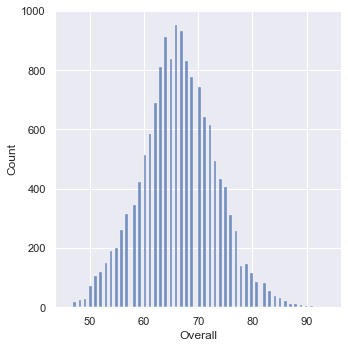

In [62]:
# your code here
import seaborn as sns
y = df['Overall']
x = df.drop('Overall', axis=1)
sns.set_theme();
bx = sns.displot(y, bins=100)

7. Split the data set into a training set and a test set. Choose `test_size` = 0.3 and `random_state` = 123  
Print train and test size      
**Attention**: You are asked to use  [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [63]:
# your code here4>>> 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
print ("X_train: ", X_train.size)
print ("y_train: ", y_train.size)
print("X_test: ", X_test.size)
print ("y_test: ", y_test.size)

X_train:  495360
y_train:  10320
X_test:  212304
y_test:  4423


8. Fit a linear model to the training set, and then report the training and testing errors obtained (the R2 statistic).   
Calculate and print the following metrics: mse, rmse, mae for the test_set

In [64]:
# your code here
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Regressor intercept : ",regressor.intercept_)
print("Regressor coef :",regressor.coef_)

y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_pred)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regressor intercept :  4.5244684431796145
Regressor coef : [ 1.93661817e-01  2.66137536e-07  2.87083725e-06  9.69859376e-02
 -9.69771274e-02  2.16372272e-01  7.92482088e-03  9.53494468e-01
 -5.04821566e-02  9.09409291e-02 -1.65568230e-02  1.03513991e-02
  1.14678840e-02 -6.17839120e-02 -7.37537029e-02 -2.35048634e-02
 -2.74112334e-02 -1.06846613e-01 -1.23503951e-01 -9.77493839e-02
 -8.83475215e-02 -1.00224657e-01  1.25457471e-02 -8.30141275e-02
 -7.88555758e-02 -8.42216644e-02  1.10771984e-01 -1.02903499e-01
 -8.43005536e-02 -9.23122024e-02 -8.18291706e-02 -5.20554770e-02
 -9.83093071e-02 -8.84092809e-02 -8.62465644e-02 -1.28062458e-01
 -1.39564072e-01 -9.07856568e-02  1.11884717e-01 -7.27883376e-02
 -8.91288377e-02 -1.13593891e-01 -7.74063896e-02 -8.40279123e-02
 -8.58675690e-02 -9.51794587e-02 -7.54757823e-02 -9.17829929e-08]
     Actual  Predicted
Age                   
22       61  63.134675
18       62  63.645081
27       74  68.334019
20       64  59.975744
21       55  55.289896

In [ ]:
# your code here

### Check residuals

9.1. Plot a histogram of the residuals (difference between `y_test` and `y_pred`

C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


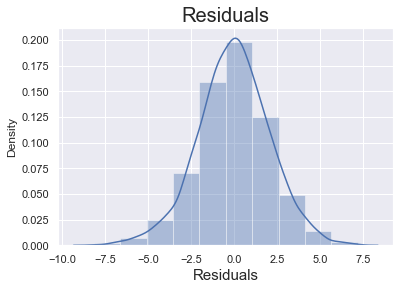

In [65]:
# your code here
residuals = y_test - y_pred 

sns.distplot(residuals, bins = 10) # you may select the no. of bins
plt.title('Residuals', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

9.2. Plot a scatter plot where `y_test` is in the **x** axis and  `y_pred` is in the **y** axis

<AxesSubplot:xlabel='Overall'>

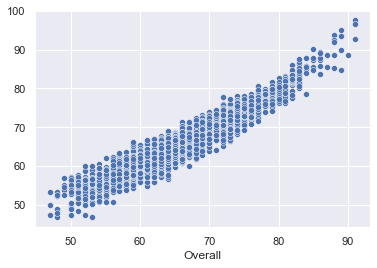

In [66]:
# your code here
sns.scatterplot(data=y_test,x=y_test,y=y_pred)

10. Try to improve the performance of your model, by adding new features

<AxesSubplot:xlabel='Overall'>

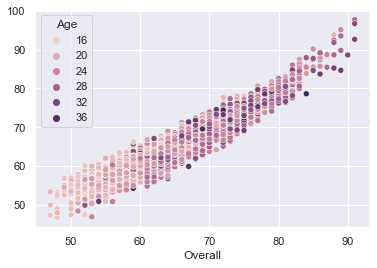

In [67]:
# your code here
sns.scatterplot(data=y_test,x=y_test,y=y_pred,hue='Age')